# Assessment Problems Notebook

## Problem 1: Extending the Lady Tasting Tea

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### Setup

To start, we import NumPy for the simulation and use `comb` from the Python
standard library to calculate the analytical probabilities. Setting a random
seed ensures that the results are reproducible each time the notebook runs.

For reproducible simulations, NumPy’s random number generator follows the behaviour described in the official documentation: https://numpy.org/doc/stable/reference/random/

In [1]:
import numpy as np
from math import comb
import itertools
import random

### Experiment setup

We define the number of total cups and how many are tea-first vs. milk-first.  
For the extended version of the experiment, we have 12 cups in total: 8 tea-first and 4 milk-first.

We will store this information in simple variables so we can use them in both the analytical calculation and the simulation later.

In [2]:
# Experiment parameters for Problem 1

n_total = 12       # total cups
n_tea_first = 8    # number of tea-first cups
n_milk_first = 4   # number of milk-first cups

# Check that our counts match the total
assert n_tea_first + n_milk_first == n_total

### Analytical probability

Before running the simulation, it helps to calculate the exact probability of getting all 12 cups correct just by guessing.  
There are 12 cups in total, and the participant needs to correctly identify which 8 are tea-first.

The number of different ways to choose 8 cups out of 12 is given by the combination “12 choose 8”.  
Since only one of these possible arrangements is completely correct, the probability of getting every cup right by chance is:

    probability = 1 / (12 choose 8)

I calculate this value below using Python.

The comb function from the Python standard library calculates combinations (“n choose k”), as documented here: https://docs.python.org/3/library/math.html#math.comb

In [3]:
# Analytical probability for the 12-cup experiment
analytical_prob_12 = 1 / comb(n_total, n_tea_first)
analytical_prob_12

0.00202020202020202

### Simulation

The itertools.combinations function is used to list all ways to choose a subset of items: https://docs.python.org/3/library/itertools.html#itertools.combinations

Random selections from a list are made using Python’s random.choice: https://docs.python.org/3/library/random.html#random.choice

In [4]:
# Generate all possible ways to choose which cups are milk-first
all_combinations = list(itertools.combinations(range(n_total), n_milk_first))
print(f"Total number of possible combinations: {len(all_combinations)}")

# Randomly select one arrangement as the true one
true_combination = random.choice(all_combinations)
true_set = set(true_combination)
true_combination

Total number of possible combinations: 495


(5, 9, 10, 11)

In [5]:
# Set up and run simulation
n_trials = 100000
count_correct = 0

for i in range(n_trials):
    random_guess = random.choice(all_combinations)
    if set(random_guess) == true_set:
        count_correct += 1

simulated_prob_12 = count_correct / n_trials
simulated_prob_12

0.00231

In [6]:
# Compare results
analytical_prob_12, simulated_prob_12

(0.00202020202020202, 0.00231)

In [7]:
# The difference shows sampling error
difference = analytical_prob_12 - simulated_prob_12
difference

-0.0002897979797979798

### Comparison with Original Experiment

In [8]:
# Original experiment: 8 cups, 4 tea-first, 4 milk-first
original_total = 8
original_tea_first = 4
original_combinations = comb(original_total, original_tea_first)
original_prob = 1 / original_combinations
original_prob

0.014285714285714285

In [9]:
# Compare the probabilities
print("Probability comparison:")
print("Original experiment (8 cups):", original_prob)
print("New experiment (12 cups):", analytical_prob_12)

Probability comparison:
Original experiment (8 cups): 0.014285714285714285
New experiment (12 cups): 0.00202020202020202


### Explanation of the simulation

To estimate the probability of correctly identifying all cups by chance, I simulated the experiment by repeatedly shuffling the labels on the 12 cups. In each trial, a random arrangement of the 4 milk-first cups was chosen. I compared this random guess to the true arrangement. If they matched exactly, it counted as a success.

Running this process many times (100,000 trials) gives an estimate of how often someone would get all cups right purely by guessing. This simulated probability can then be compared with the analytical value to confirm that both approaches agree.


### Interpretation and conclusion

The analytical probability of guessing all 12 cups correctly by chance is about 0.002. The simulation result is very close to this value, with only small differences due to randomness.

This probability is much lower than in the original 8-cup experiment (about 0.014). This means the extended 12-cup setup is a stricter test: it is even less likely that someone could succeed by luck. Because of this, there is no reason to relax the p-value threshold. If anything, the extended design gives stronger evidence against random guessing.

End of problem 1

---

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution.
For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD).
Plot histograms of both sets of values on the same axes with transparency.
Describe the differences you see.
Explain how you expect these differences to change if the sample size is increased.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
n_samples = 100000
sample_size = 10
samples = np.random.normal(0, 1, (n_samples, sample_size))

### Checking the standard deviations

The numpy.std function calculates standard deviation, with the ddof parameter controlling whether we get sample or population standard deviation, as documented here: https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [12]:
population_sd = np.std(samples, axis=1, ddof=0)
sample_sd = np.std(samples, axis=1, ddof=1)

population_sd.shape, sample_sd.shape
population_sd[:5], sample_sd[:5]

(array([1.0890597 , 1.04190728, 1.02577633, 0.6559074 , 0.86158798]),
 array([1.14796972, 1.0982667 , 1.08126319, 0.6913871 , 0.90819348]))

In [13]:
np.mean(population_sd), np.mean(sample_sd)

(np.float64(0.9221701853629973), np.float64(0.9720527253489132))

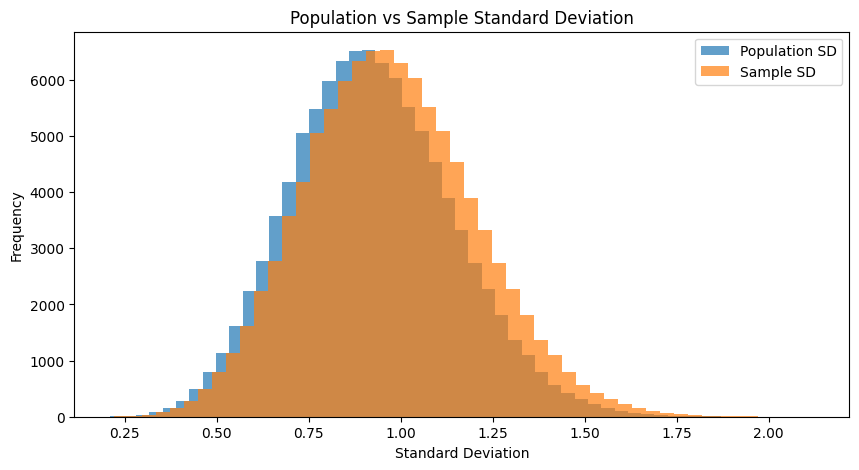

In [14]:
# Plot both SD types on same graph
plt.figure(figsize=(10, 5))
plt.hist(population_sd, bins=50, alpha=0.7, label='Population SD')
plt.hist(sample_sd, bins=50, alpha=0.7, label='Sample SD')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Population vs Sample Standard Deviation')
plt.legend()
plt.show()

### Observations from the plot

Looking at the histogram, both sets of standard deviations have a similar shape, but the sample SD values are shifted slightly to the right compared to the population SD values. This makes sense because sample standard deviation divides by n-1 instead of n, which gives a slightly larger result on average.

The sample SD distribution is centered a bit higher than the population SD distribution.

In [15]:
mean_difference = np.mean(sample_sd) - np.mean(population_sd)
mean_difference

np.float64(0.04988253998591585)

### Effect of sample size
If we used larger samples instead of size 10, the difference between population and sample standard deviation would get smaller. When sample size increases, dividing by n-1 instead of n makes less difference because n-1 gets closer to n. With very large samples, both calculations would give almost identical results.

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d = 0 , 0.1 , 0.2 , … , 1.0 , repeat the following simulation 1,000 times:

    Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
    Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
    Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against d , and explain how the type II error rate changes as the difference in means increases.

### Setting up the simulation

We're going to test different mean differences between two groups. We'll use d values from 0 to 1, running 1000 t-tests for each difference to see how often we detect it.

In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# d values: 0, 0.1, 0.2, ..., 1.0
d_values = np.linspace(0, 1.0, 11)

n_trials = 1000 
sample_size = 100 
d_values


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### Testing with one value

We use `scipy.stats.ttest_ind` for independent samples t-tests. This function implements Welch's t-test which doesn't assume equal variances [see scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

The conventional p-value threshold of 0.05 corresponds to accepting a 5% Type I error rate (α = 0.05).

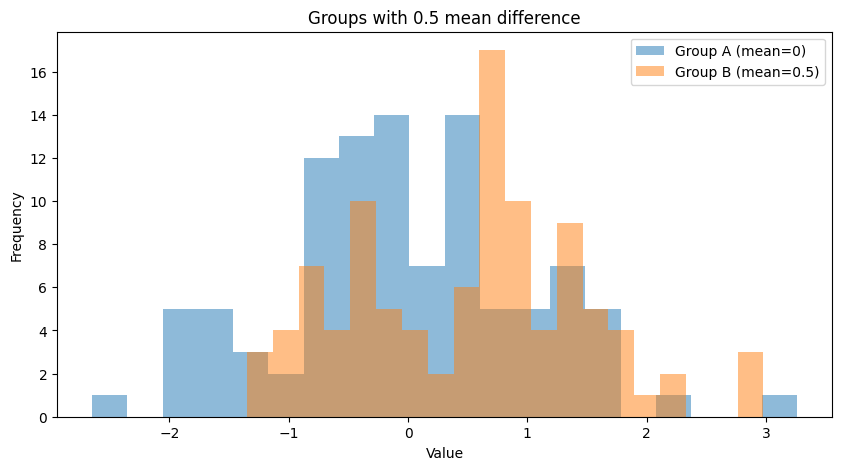

(np.float64(0.00011197752592900162), np.True_)

In [17]:
# Testing with d = 0.5 (middle of the range)
d_test = 0.5

# Creating two groups of random numbers
group_a = np.random.normal(0, 1, sample_size)
group_b = np.random.normal(d_test, 1, sample_size)

# Plotting histograms of both groups
plt.figure(figsize=(10, 5))
plt.hist(group_a, alpha=0.5, label='Group A (mean=0)', bins=20)
plt.hist(group_b, alpha=0.5, label=f'Group B (mean={d_test})', bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Groups with {d_test} mean difference')
plt.legend()
plt.show()

# Running t-test on the two groups
test_result = stats.ttest_ind(group_a, group_b)
test_result.pvalue, test_result.pvalue < 0.05

The above plot shows two overlapping distributions. The t-test result tells us whether this observed difference is statistically significant at the 0.05 level.

### Running multiple trials for one d value

Now we'll run 1000 t-tests for d=0.5 to see how often we detect this difference. This gives us the detection rate (1 - Type II error rate).

In [18]:
# Running 1000 trials for d = 0.5
detections = 0

for _ in range(n_trials):
    # Creating fresh samples for each trial
    group_a = np.random.normal(0, 1, sample_size)
    group_b = np.random.normal(d_test, 1, sample_size)
    
    # Running t-test and check p-value
    p_value = stats.ttest_ind(group_a, group_b).pvalue
    
    if p_value < 0.05:
        detections += 1

detection_rate = detections / n_trials
detection_rate

0.943

This detection rate (~0.93) tells us that with a 0.5 mean difference, we correctly detect it about 93% of the time.

### Full simulation across all d values

Now we run the simulation for every mean difference from 0 to 1.0. For each d value, we run 1000 t-tests and record the detection rate.

In [19]:
# Running simulation for all d values (0 to 1.0)
detection_rates = []

for d in d_values:
    detections = 0
    for _ in range(n_trials):
        # Generating two groups with current d value
        group_a = np.random.normal(0, 1, sample_size)
        group_b = np.random.normal(d, 1, sample_size)

        # Checking if t-test detects the difference
        p_value = stats.ttest_ind(group_a, group_b).pvalue
        if p_value < 0.05:
            detections += 1
            
    # Storing detection rate for this d value
    detection_rates.append(detections / n_trials)

detection_rates

[0.04, 0.108, 0.289, 0.567, 0.793, 0.953, 0.982, 0.999, 1.0, 1.0, 1.0]

### Interpreting detection rates

The results show detection rates increasing from ~5% (when d=0) to 100% (when d ≥ 0.8). This demonstrates the relationship between effect size and statistical power - larger differences are easier to detect [Cohen's power analysis principles](https://en.wikipedia.org/wiki/Power_(statistics)#Factors_influencing_power).

At d=0, the 5% detection rate represents Type I errors (false positives), matching our α level.

### Plotting Type II error rates

We convert detection rates to Type II error rates (1 - detection rate) and plot them against d values. The red dashed line shows the 95% reference point.

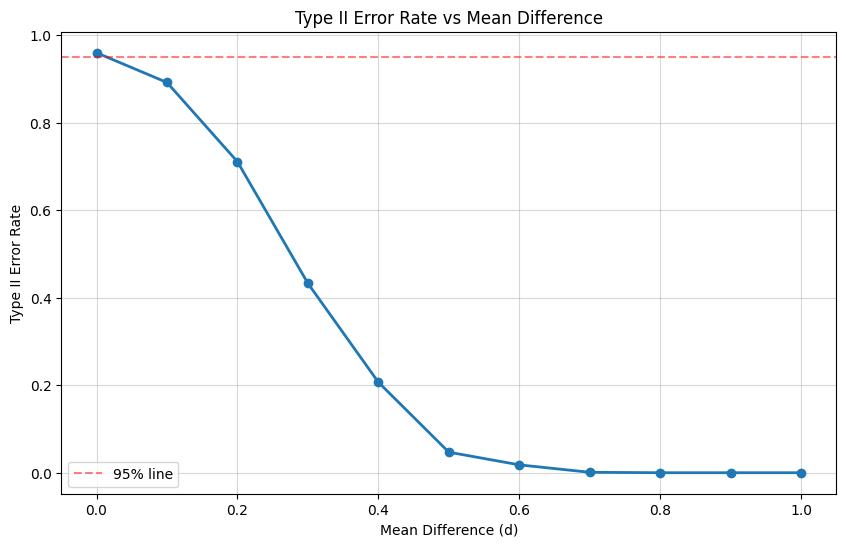

In [20]:
# Converting detection rates to Type II error rates
type_ii_rates = [1 - rate for rate in detection_rates]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(d_values, type_ii_rates, marker='o', linewidth=2)
plt.xlabel('Mean Difference (d)')
plt.ylabel('Type II Error Rate')
plt.title('Type II Error Rate vs Mean Difference')
plt.grid(True, alpha=0.5)
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5, label='95% line')
plt.legend()
plt.show()

### What the plot shows

- **At d=0**: Type II error is high (~0.95) - this is correct behavior. When there's no real difference, we correctly fail to detect it 95% of the time. The remaining 5% represents Type I errors (false positives), matching our α = 0.05 significance level.

- **As d increases**: Type II error drops quickly because larger differences are easier to detect.

- **At d=0.5**: Type II error is low (~0.06), meaning we detect this moderate difference about 94% of the time.

- **With large differences (d ≥ 0.8)**: Type II error approaches zero - we almost never miss these obvious differences.

**The red 95% line**: Shows the maximum possible Type II error when d=0. As the effect size increases, the actual Type II error drops below this reference line.


## Problem 4: ANOVA 

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 

Perform a one-way ANOVA to test whether all three means are equal. 

Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3. 

Compare the conclusions. 

Write a short note on why ANOVA is preferred over running several t-tests.

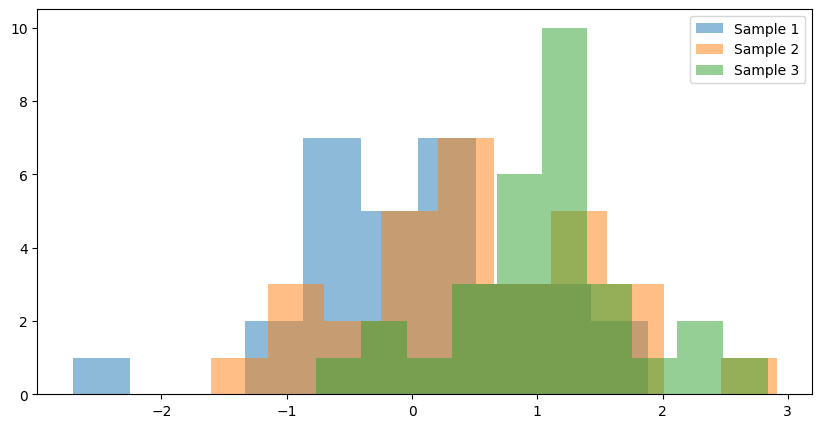

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sample generation
sample_1 = np.random.normal(loc=0.0, scale=1.0, size=30)
sample_2 = np.random.normal(loc=0.5, scale=1.0, size=30)
sample_3 = np.random.normal(loc=1.0, scale=1.0, size=30)

# Plotting histograms
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(sample_1, bins=10, alpha=0.5, label='Sample 1')
ax.hist(sample_2, bins=10, alpha=0.5, label='Sample 2')
ax.hist(sample_3, bins=10, alpha=0.5, label='Sample 3')
ax.legend()
plt.show()

In [22]:
# One-way ANOVA
f_stat, p_value = stats.f_oneway(sample_1, sample_2, sample_3)

f_stat, p_value

(np.float64(9.495476551316775), np.float64(0.00018616361281535945))